In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
#import libraries
import numpy as np
import tensorflow
from tensorflow import keras
from keras.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt

%run utils.py

from dict_utils import load_dictionary_data
from utils import load_train_test, normalise, denormalise

In [4]:
data = load_dictionary_data("new_dictionary.pickle")
high = max(data.values())
low = min(data.values())

In [5]:
print(high)
print(low)

-1.347716529e-08
-4.232721913e-08


In [6]:
(X_train,y_train),(X_test,y_test) = load_train_test(data)

y_train = normalise(y_train,high,low)
y_test = normalise(y_test,high,low)

There are 13779 samples in the training dataset


In [7]:
count = 0
for x in y_train:
    if x < 0.50:
        count+=1
print(count)

242


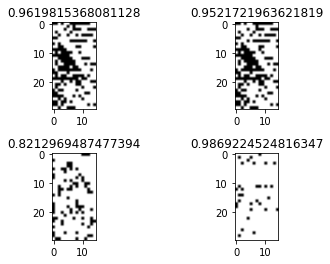

In [8]:
plt.subplot(2,2,1)
plt.subplots_adjust(hspace=0.5)
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))
plt.title(y_test[0])
plt.subplot(2,2,2)
plt.imshow(X_train[3500], cmap=plt.get_cmap('gray'))
plt.title(y_train[3500])
plt.subplot(2,2,3)
plt.imshow(X_train[7000], cmap=plt.get_cmap('gray'))
plt.title(y_train[7000])
plt.subplot(2,2,4)
plt.imshow(X_train[9000], cmap=plt.get_cmap('gray'))
plt.title(y_train[9000])


#show the plot
plt.show()

In [9]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(30, 15, 1), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(16,(6,6), activation='relu'))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='linear'))
    #Compile/train model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[mean_absolute_percentage_error])
    return model

In [10]:
batch_size = 120
epochs = 50

In [11]:
model = cnn_model()

model.fit(X_train, y_train,
          validation_split= 0.2,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-09-04 11:06:08.154228: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-04 11:06:08.155154: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2023-09-04 11:06:08.657963: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-04 11:06:08.876694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 11:06:10.592928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


92/92 - 2s - loss: 0.0132 - mean_absolute_percentage_error: 7.8715 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 6.1099 - 2s/epoch - 23ms/step
Epoch 2/50
92/92 - 1s - loss: 0.0013 - mean_absolute_percentage_error: 4.2868 - val_loss: 0.0018 - val_mean_absolute_percentage_error: 4.7547 - 1s/epoch - 15ms/step
Epoch 3/50
92/92 - 1s - loss: 9.5334e-04 - mean_absolute_percentage_error: 3.5292 - val_loss: 0.0017 - val_mean_absolute_percentage_error: 4.6635 - 1s/epoch - 15ms/step
Epoch 4/50
92/92 - 1s - loss: 8.3588e-04 - mean_absolute_percentage_error: 2.9893 - val_loss: 0.0016 - val_mean_absolute_percentage_error: 4.0164 - 1s/epoch - 15ms/step
Epoch 5/50
92/92 - 1s - loss: 7.6594e-04 - mean_absolute_percentage_error: 2.7940 - val_loss: 0.0019 - val_mean_absolute_percentage_error: 5.3219 - 1s/epoch - 14ms/step
Epoch 6/50
92/92 - 1s - loss: 7.2552e-04 - mean_absolute_percentage_error: 2.8767 - val_loss: 0.0012 - val_mean_absolute_percentage_error: 3.7060 - 1s/epoch - 15ms/step
Epoch

In [12]:
model.evaluate(x=X_test, y=y_test)

106/106 [==============================] - 1s 5ms/step - loss: 4.7045e-04 - mean_absolute_percentage_error: 38634.0117


[0.00047044819802977145, 38634.01171875]

In [13]:
model.save("simple_CNN.keras")

In [14]:
m = keras.models.load_model("simple_CNN.keras")

y_pred = model.predict(X_test)

2023-09-04 11:10:13.833123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


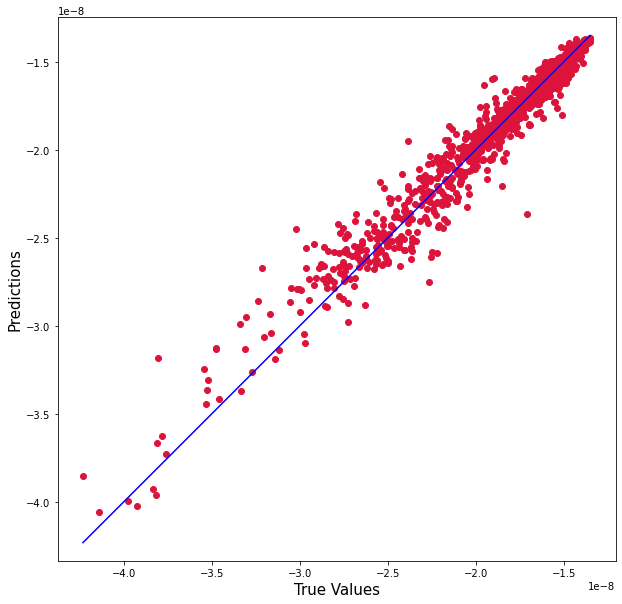

In [15]:
for p,a in [(y_pred,y_test)]:
    true_value = denormalise(a, high,low)
    predicted_value = denormalise(p,high,low)
    #true_value = a
    #predicted_value = p

    plt.figure(figsize=(10,10))
    plt.scatter(true_value, predicted_value, c='crimson')

    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

In [16]:
min(true_value)

-4.232721913e-08

In [17]:
max(predicted_value)

array([-1.3665439e-08], dtype=float32)